In [1]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
files = [file for file in os.listdir ('./EPL_teams_2324')]
EPL_2324=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2324", file)) # This line!
    df = df.iloc[::-1]
    EPL_2324= pd.concat ([EPL_2324, df], ignore_index=True)

EPL_2324.to_csv("EPL_2324.csv",index= False)
EPL_2324

,Rk,Team,Date,Opp,Comp,Result,GF,GA,GD,Poss,...,TotDist.1,PrgDist.1,PrgC,1/3.1,CPA,Mis,Dis,Rec,PrgR,Match Report
0,14,Arsenal,2023-12-02,Wolves,eng Premier League,W 2-1,2,1,1,57,...,2285,1112,23,12,9,15,8,561,77,Match Report
1,13,Arsenal,2023-11-25,Brentford,eng Premier League,W 1-0,1,0,1,64,...,1818,844,21,17,9,15,8,439,50,Match Report
2,12,Arsenal,2023-11-11,Burnley,eng Premier League,W 3-1,3,1,2,63,...,2141,1053,21,3,10,5,7,503,70,Match Report
3,11,Arsenal,2023-11-04,Newcastle Utd,eng Premier League,L 0-1,0,1,-1,58,...,1541,840,15,12,4,9,10,429,52,Match Report
4,10,Arsenal,2023-10-28,Sheffield Utd,eng Premier League,W 5-0,5,0,5,67,...,2516,1278,23,11,12,12,15,603,57,Match Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,5,Wolves,2023-09-16,Liverpool,eng Premier League,L 1-3,1,3,-2,35,...,1912,1002,23,15,9,20,9,328,29,Match Report
276,4,Wolves,2023-09-03,Crystal Palace,eng Premier League,L 2-3,2,3,-1,57,...,2186,1275,17,20,4,11,14,464,46,Match Report
277,3,Wolves,2023-08-26,Everton,eng Premier League,W 1-0,1,0,1,53,...,2481,1191,11,9,2,20,13,433,34,Match Report
278,2,Wolves,2023-08-19,Brighton,eng Premier League,L 1-4,1,4,-3,47,...,2366,1099,24,16,12,17,17,418,38,Match Report


In [3]:
files = [file for file in os.listdir ('./EPL_teams_2223')]
EPL_2223=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2223", file)) # This line!
    EPL_2223= pd.concat ([EPL_2223, df], ignore_index=True)
EPL_2223.to_csv("EPL_2223.csv",index= False)

EPL_2223.shape

(760, 87)

In [4]:
files = [file for file in os.listdir ('./EPL_teams_2122')]
EPL_2122=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2122", file)) # This line!
    EPL_2122= pd.concat ([EPL_2122, df], ignore_index=True)
EPL_2122.to_csv("EPL_2122.csv",index= False)

EPL_2122.shape

(760, 87)

In [5]:
files = [file for file in os.listdir ('./EPL_teams_2021')]
EPL_2021=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_2021", file)) # This line!
    EPL_2021= pd.concat ([EPL_2021, df], ignore_index=True)
EPL_2021.to_csv("EPL_2021.csv",index= False)

EPL_2021.shape

(760, 87)

In [6]:
files = [file for file in os.listdir ('./EPL_teams_1920')]
EPL_1920=pd.DataFrame()
for file in files:
    df= pd.read_csv(os.path.join("./EPL_teams_1920", file)) # This line!
    EPL_1920= pd.concat ([EPL_1920, df], ignore_index=True)
EPL_1920.to_csv("EPL_1920.csv",index= False)

EPL_1920.shape

(760, 87)

In [7]:
df_EPL = pd.concat([EPL_2324, EPL_2223, EPL_2122, EPL_2021], ignore_index=True)

df_EPL.fillna(0, inplace=True)
df_EPL = df_EPL.drop(['Rk', 'Comp', 'Match Report'], axis=1)

In [8]:
for i, row in df_EPL.iterrows():
    string = row['Result']
    if string[0] == 'W':
        df_EPL.loc[i, 'Result'] = 'W'
    if string[0] == 'L':
        df_EPL.loc[i, 'Result'] = 'L'
    if string[0] == 'D':
        df_EPL.loc[i, 'Result'] = 'D'

df_EPL["Result"] = df_EPL["Result"].map({"W" : 0 , "L" : 2, "D": 1})

In [9]:
df_EPL.columns =['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'Poss', 'G-PG',
           'PG', 'PKatt', 'PKm', 'OPcmp', 'OPatt', 'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa',
           'OPprg', 'OPdist', 'OPprgdist', 'SPcmp', 'SPatt', 'SP%', 'MPcmp',
           'MPatt', 'MP%', 'LPcmp', 'LPatt', 'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff',
           'DTkl', 'Dtkl', 'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int',
           'TklInt', 'Clr', 'Err', 'xG', 'npxG', 'xGD', 'npxGD', 'xAG', 'xA', 'G-xG',
           'npG-npxG', 'A-xAG', 'npxG/S', 'TotS', 'G/S', 'G/SoT', 'SoT', 'SoT%',
           'Sdist', 'FK', 'PSxG', 'PSxG/SoT',
           'PSxG-GA', 'Touches', 'Tdefpa', 'Tdef', 'Tmid',
           'Toff', 'Toffpa', 'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
           'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']
df_EPL = df_EPL.drop(columns=['Poss', 'G-PG', 'PG', 'PKatt', 'PKm', 'G-xG',
                              'npG-npxG', 'A-xAG','PSxG-GA','G/S', 'G/SoT', 
                              'Err', 'FK','xGD', 'npxGD'])

In [10]:
df_EPL.to_csv("EPL_ver1.csv",index= False)

In [11]:
df_EPL.columns

Index(['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD', 'OPcmp', 'OPatt',
       'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa', 'OPprg', 'OPdist', 'OPprgdist',
       'SPcmp', 'SPatt', 'SP%', 'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt',
       'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff', 'DTkl', 'Dtkl',
       'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int', 'TklInt', 'Clr', 'xG',
       'npxG', 'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist', 'PSxG',
       'PSxG/SoT', 'Touches', 'Tdefpa', 'Tdef', 'Tmid', 'Toff', 'Toffpa',
       'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
       'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR'],
      dtype='object')

# OPP TABLE

In [12]:
constr_cols = ['OPcmp', 'OPatt',
       'OP%', 'KP', 'OP2fin', 'OP2pa', 'C2pa', 'OPprg', 'OPdist', 'OPprgdist',
       'SPcmp', 'SPatt', 'SP%', 'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt',
       'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff', 'DTkl', 'Dtkl',
       'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int', 'TklInt', 'Clr', 'xG',
       'npxG', 'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist', 'PSxG',
       'PSxG/SoT', 'Touches', 'Tdefpa', 'Tdef', 'Toff', 'Toffpa',
       'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
       'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']

'''

df_EPL_opp = df_EPL.copy()

for i in contr_cols:
    df[i] = ''

for j, row in df_EPL.iterrows():
    for k, r in df_EPL.iterrows():
        if row['Team'] == r['Opp'] and row['Date'] == r['Date']:
            for i in constr_cols:
                df_EPL_opp.loc[k, f'OPP_{i}'] = df_EPL_opp.loc[j, i]
                constr_cols_away.append(f'OPP_{i}')
            continue

df_EPL_opp.to_csv("EPL_opp_ver1.csv",index= False)
'''

'\n\ndf_EPL_opp = df_EPL.copy()\n\nfor i in contr_cols:\n    df[i] = \'\'\n\nfor j, row in df_EPL.iterrows():\n    for k, r in df_EPL.iterrows():\n        if row[\'Team\'] == r[\'Opp\'] and row[\'Date\'] == r[\'Date\']:\n            for i in constr_cols:\n                df_EPL_opp.loc[k, f\'OPP_{i}\'] = df_EPL_opp.loc[j, i]\n                constr_cols_away.append(f\'OPP_{i}\')\n            continue\n\ndf_EPL_opp.to_csv("EPL_opp_ver1.csv",index= False)\n'

In [13]:
df_EPL_opp = pd.read_csv("EPL_opp_ver1.csv", sep = ",")


homecols = ['OPcmp', 'OPatt','OP%', 'KP',
       'OP2fin', 'OP2pa', 'C2pa', 'OPprg', 'OPdist', 'OPprgdist',
       'SPcmp', 'SPatt', 'SP%', 'MPcmp', 'MPatt', 'MP%', 'LPcmp', 'LPatt',
       'LP%', 'Tkl', 'TklW', 'Tkldef', 'Tklmid', 'Tkloff', 'DTkl', 'Dtkl',
       'DTkl%', 'LostTkl', 'Blocks', 'BS', 'BP', 'Int', 'TklInt', 'Clr', 'xG',
       'npxG', 'xAG', 'xA', 'npxG/S', 'TotS', 'SoT', 'SoT%', 'Sdist', 'Touches',
       'Tdefpa', 'Tdef', 'Toff', 'Toffpa',
       'Tlive', 'Carr', 'CarrDist', 'CarrPrgDist', 'CarrPrg', 'Carr2fin',
       'Carr2pa', 'CarrF', 'CarrD', 'Rec', 'PrgR']

awaycols = ['OPP_OPcmp', 'OPP_OPatt', 'OPP_OP%', 'OPP_KP', 'OPP_OP2fin', 'OPP_OP2pa', 'OPP_C2pa', 'OPP_OPprg',
            'OPP_OPdist', 'OPP_OPprgdist', 'OPP_SPcmp', 'OPP_SPatt', 'OPP_SP%', 'OPP_MPcmp', 'OPP_MPatt',
            'OPP_MP%', 'OPP_LPcmp', 'OPP_LPatt', 'OPP_LP%', 'OPP_Tkl', 'OPP_TklW', 'OPP_Tkldef', 'OPP_Tklmid',
            'OPP_Tkloff', 'OPP_DTkl', 'OPP_Dtkl', 'OPP_DTkl%', 'OPP_LostTkl', 'OPP_Blocks', 'OPP_BS', 'OPP_BP',
            'OPP_Int', 'OPP_TklInt', 'OPP_Clr', 'OPP_xG', 'OPP_npxG', 'OPP_xAG', 'OPP_xA', 'OPP_npxG/S', 'OPP_TotS',
            'OPP_SoT', 'OPP_SoT%', 'OPP_Sdist', 'OPP_Touches', 'OPP_Tdefpa', 'OPP_Tdef', 'OPP_Toff',
            'OPP_Toffpa', 'OPP_Tlive', 'OPP_Carr', 'OPP_CarrDist', 'OPP_CarrPrgDist', 'OPP_CarrPrg', 'OPP_Carr2fin',
            'OPP_Carr2pa', 'OPP_CarrF', 'OPP_CarrD', 'OPP_Rec', 'OPP_PrgR']

psxgcols = ['PSxG','PSxG/SoT','OPP_PSxG/SoT','OPP_PSxG']

columnsTitles = ['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD'] + homecols + awaycols + psxgcols

df_EPL_opp = df_EPL_opp.reindex(columns=columnsTitles)

# RANDOM FOREST MODEL TRAINING

In [147]:
X_opp = df_EPL_opp.drop(columns=['Date', 'Result', 'GF', 'GA', 'GD'], axis=1)

y_opp = df_EPL_opp['GF']


X_train_opp, X_test_opp, y_train_opp, y_test_opp = train_test_split(X_opp, y_opp, test_size = 0.3, random_state = 0)
X_opp.shape

(2560, 126)

In [15]:
encoder = ce.OrdinalEncoder(cols=['Team', 'Opp'])
X_train_opp = encoder.fit_transform(X_train_opp)
X_test_opp = encoder.transform(X_test_opp)
sta = StandardScaler()
X_train_opp = sta.fit_transform(X_train_opp)
X_test_opp = sta.transform(X_test_opp)

rfc_opp = RandomForestClassifier(bootstrap=False, max_depth=25, max_features=15,n_jobs=-1)
rfc_opp.fit(X_train_opp, y_train_opp)

# Evaluating on Training set
y_pred_train_opp = rfc_opp.predict_proba(X_train_opp)
#print(classification_report(y_train_opp, y_pred_train_opp))

y_pred_test_opp = rfc_opp.predict_proba(X_test_opp)
#print(classification_report(y_test_opp, y_pred_test_opp))

y_pred_test_opp

array([[0.92      , 0.07      , 0.01      , ..., 0.        , 0.        ,
        0.        ],
       [0.01      , 0.1       , 0.44      , ..., 0.        , 0.        ,
        0.        ],
       [0.23      , 0.59      , 0.12      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26      , 0.62985714, 0.11014286, ..., 0.        , 0.        ,
        0.        ],
       [0.77      , 0.21      , 0.01      , ..., 0.        , 0.        ,
        0.        ],
       [0.33      , 0.55      , 0.1       , ..., 0.        , 0.        ,
        0.        ]])

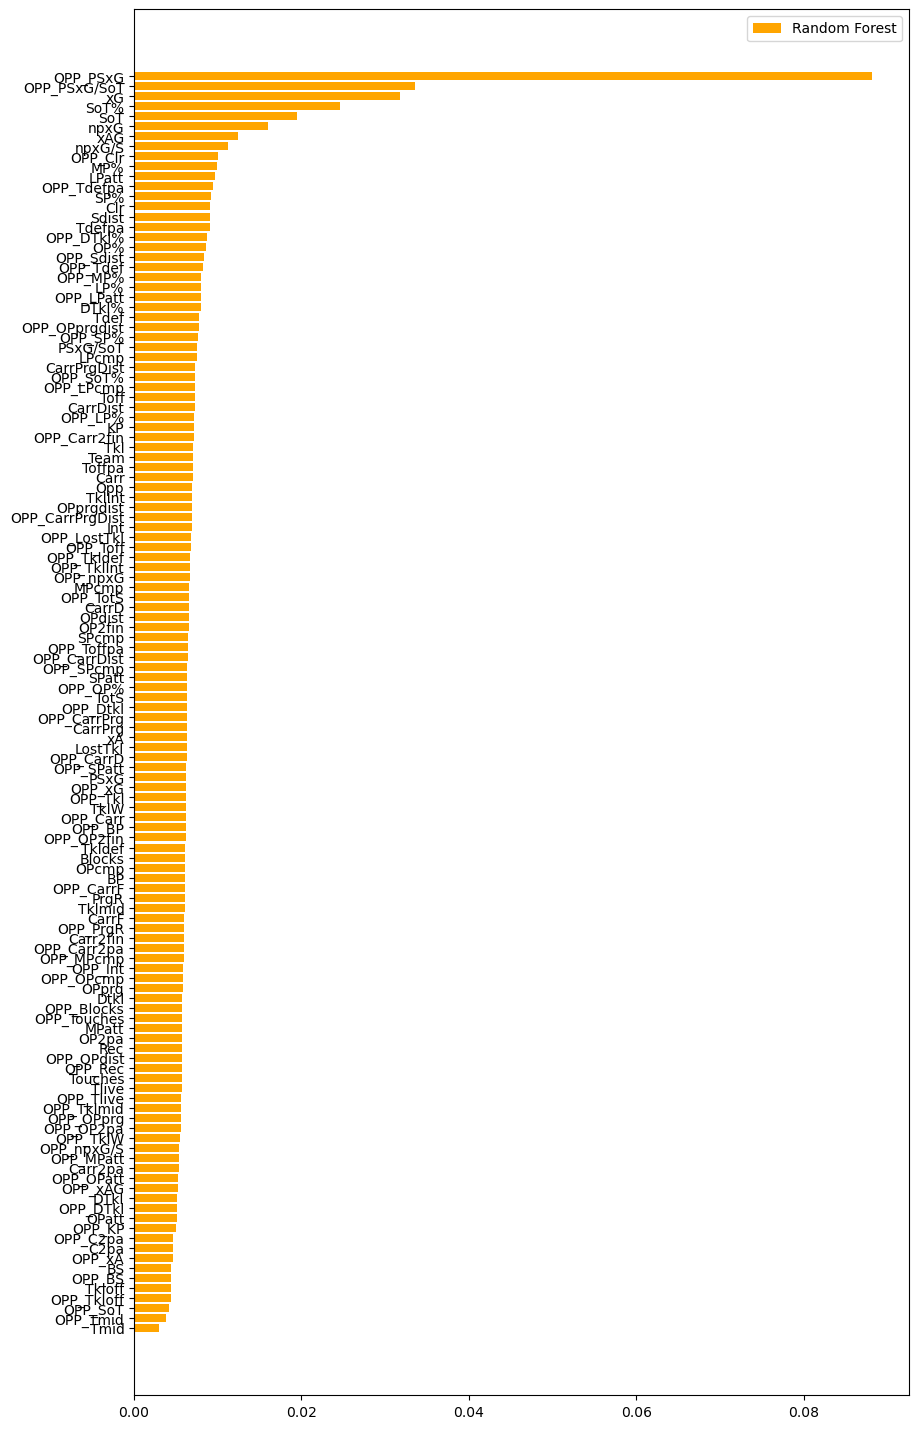

In [153]:
feature_importance_opp = pd.DataFrame({'rfc':rfc_opp.feature_importances_},index = df_EPL_opp.drop(columns=['Date', 'Result',
                                  'GF', 'GA', 'GD']).columns)
feature_importance_opp.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance_opp))
fig, ax = plt.subplots(figsize = (10,18))
rfc_feature_opp = ax.barh(index, feature_importance_opp['rfc'], color = 'orange', label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance_opp.index)

ax.legend()
plt.savefig("myImagePDF_opp.pdf", format="pdf", bbox_inches="tight")
plt.show()

# FUNCTIONS FOR GAME SIMULATION

In [17]:
def teamDF(team, df):
    return df[df.Team == team].drop(columns=['Result', 'GF', 'GA', 'GD'], axis=1).reset_index(drop=True)

In [18]:
# Function to calculate mean with random choice
def calculate_mean_random(df_tmp, col, num_samples=10):
        values_counts = df_tmp[col].value_counts(normalize=True)
        random_sample = np.random.choice(values_counts.index.tolist(), num_samples, p=values_counts)
        first10 = df_tmp.loc[:num_samples, col]
        return round(((sum(random_sample)/len(random_sample)) + 3*(sum(first10)/len(first10)))*0.25,2)

In [19]:
def calculate_mean_random_optimized(df_tmp, col, num_samples=10):
    unique_values, counts = np.unique(df_tmp[col], return_counts=True)
    probabilities = counts / len(df_tmp)

    random_sample = np.random.choice(unique_values, num_samples, p=probabilities)
    first10 = df_tmp.loc[:num_samples, col]
    return round(((sum(random_sample)/len(random_sample)) + 3*(sum(first10)/len(first10)))*0.25,2)


In [20]:
def goalSim(home, away, df, rfc, df_home, df_away):
    
    columns = ['Team', 'Opp'] + homecols + awaycols + psxgcols
    sim = pd.DataFrame(columns=columns)
    
    sim.at[0, 'Team'] = home
    sim.at[0, 'Opp'] = away
    
      
    # Calculate means for homecols
    for col in homecols:
        sim.at[0, col] = calculate_mean_random_optimized(df_home, col)

    # Calculate means for awaycols
    for col in awaycols:
        sim.at[0, col] = calculate_mean_random_optimized(df_away, col[4:])
    
    # Calculate means for psxgcols
    for col in psxgcols:
        sim.at[0, col] = calculate_mean_random_optimized(df_home if 'OPP' in col else df_away, col if 'OPP' in col else f'OPP_{col}')
    
    game = sim.copy()
    
    sim = encoder.transform(sim)
    sim = sta.transform(sim)
    
    prob_list = rfc.predict_proba(sim).tolist()
    fin = [prob_list[0][0],prob_list[0][1],prob_list[0][2],prob_list[0][3],sum(prob_list[0][4:])]
    
    return fin, game

In [21]:
def simulateGame(h_goals, a_goals):
    goals = [0, 1, 2, 3, 4]
    
    h_goal_actual = np.random.choice(goals, 1, p=h_goals)[0]
    a_goal_actual = np.random.choice(goals, 1, p=a_goals)[0]
    
    result = 0
    
    if h_goal_actual > a_goal_actual:
        result = 0
    elif a_goal_actual > h_goal_actual:
        result = 2
    else:
        result = 1
    
    return (result, h_goal_actual, a_goal_actual)

In [22]:
def simulateGW(gw, df, rfc, teams_dict):

    columns = ['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD'] + homecols + awaycols + psxgcols
    df_gw = pd.DataFrame(columns=columns)
    for i in gw:
        home_gs = goalSim(i[0], i[1], df, rfc,teams_dict[i[0]][2],teams_dict[i[1]][2])
        away_gs = goalSim(i[1], i[0], df, rfc,teams_dict[i[1]][2],teams_dict[i[0]][2])
        
        game = simulateGame(home_gs[0], away_gs[0])
        date = 'sim'
        teams = [i[0], i[1]]
        
        home_result = game[0]
        
        away_result = 1
        if home_result==0:
            away_result = 2
        elif home_result==2:
            away_result = 0
            
        for j, team in enumerate(teams):
            opp_team = teams[1 - j]
            gf, ga = game[j + 1], game[2 - j]
            gd = gf - ga
            
            psxg_values = []
            
            if j==0:
                psxg_values.append(away_gs[1].at[0, 'OPP_PSxG'])
                psxg_values.append(away_gs[1].at[0, 'OPP_PSxG/SoT'])
                psxg_values.append(home_gs[1].at[0, 'OPP_PSxG/SoT'])
                psxg_values.append(home_gs[1].at[0, 'OPP_PSxG'])
                
                result = home_result
                data_row = home_gs[1][homecols].values.tolist()[0] + away_gs[1][awaycols].values.tolist()[0]
                new_row = [[team, date, opp_team, result, gf, ga, gd] + data_row + psxg_values]
            
                df1 = pd.DataFrame(new_row, columns=columns)
                teams_dict[i[0]][2] = pd.concat([df1, teams_dict[i[0]][2]], ignore_index=True)
                df_gw = pd.concat([df1, df_gw], ignore_index=True)
            else:
                psxg_values.append(home_gs[1].at[0, 'OPP_PSxG'])
                psxg_values.append(home_gs[1].at[0, 'OPP_PSxG/SoT'])
                psxg_values.append(away_gs[1].at[0, 'OPP_PSxG/SoT'])
                psxg_values.append(away_gs[1].at[0, 'OPP_PSxG'])
                
                result = away_result
                data_row = away_gs[1][homecols].values.tolist()[0] + home_gs[1][awaycols].values.tolist()[0]
                new_row = [[team, date, opp_team, result, gf, ga, gd] + data_row + psxg_values]
            
                df1 = pd.DataFrame(new_row, columns=columns)
                teams_dict[i[1]][2] = pd.concat([df1, teams_dict[i[1]][2]], ignore_index=True)
                df_gw = pd.concat([df1, df_gw], ignore_index=True)


    return pd.concat([df_gw, df], ignore_index=True), teams_dict


In [23]:
def simulateGW_opt(gw, df, rfc, teams_dict):
    columns = ['Team', 'Date', 'Opp', 'Result', 'GF', 'GA', 'GD'] + homecols + awaycols + psxgcols
    df_gw_list = []

    for i in gw:
        home_gs = goalSim(i[0], i[1], df, rfc, teams_dict[i[0]][2], teams_dict[i[1]][2])
        away_gs = goalSim(i[1], i[0], df, rfc, teams_dict[i[1]][2], teams_dict[i[0]][2])
        
        game = simulateGame(home_gs[0], away_gs[0])
        date = 'sim'
        teams = [i[0], i[1]]
        
        home_result = game[0]
        away_result = 2 if home_result == 0 else (0 if home_result == 2 else 1)
        
        for j, team in enumerate(teams):
            opp_team = teams[1 - j]
            gf, ga = game[j + 1], game[2 - j]
            gd = gf - ga

            psxg_values = [away_gs[1].at[0, 'OPP_PSxG'], away_gs[1].at[0, 'OPP_PSxG/SoT'],
                           home_gs[1].at[0, 'OPP_PSxG/SoT'], home_gs[1].at[0, 'OPP_PSxG']] if j == 0 else \
                          [home_gs[1].at[0, 'OPP_PSxG'], home_gs[1].at[0, 'OPP_PSxG/SoT'],
                           away_gs[1].at[0, 'OPP_PSxG/SoT'], away_gs[1].at[0, 'OPP_PSxG']]

            result = home_result if j == 0 else away_result
            data_row = (home_gs[1][homecols] if j == 0 else away_gs[1][homecols]).values.tolist()[0] + \
                       (away_gs[1][awaycols] if j == 0 else home_gs[1][awaycols]).values.tolist()[0]

            new_row = [[team, date, opp_team, result, gf, ga, gd] + data_row + psxg_values]
            df1 = pd.DataFrame(new_row, columns=columns)
            teams_dict[i[j]][2] = pd.concat([df1, teams_dict[i[j]][2]], ignore_index=True)
            df_gw_list.append(df1)

    df_gw = pd.concat(df_gw_list, ignore_index=True)
    return pd.concat([df_gw, df], ignore_index=True), teams_dict


# DATA READING FOR LEAGUE TABLES AND FIXTURE LISTS

In [24]:
df_EPL_fixt = pd.read_csv("fixtures.csv", sep = ",")
df_EPL_fixt = df_EPL_fixt.replace('Man City', 'Manchester City')
df_EPL_fixt = df_EPL_fixt.replace('Spurs', 'Tottenham')
df_EPL_fixt = df_EPL_fixt.replace('Nottingham Forest', "Nott'ham Forest")
df_EPL_fixt = df_EPL_fixt.replace('Man Utd', 'Manchester Utd')
df_EPL_fixt = df_EPL_fixt.replace('Luton', 'Luton Town')
df_EPL_fixt = df_EPL_fixt.replace('Newcastle', 'Newcastle Utd')

In [25]:
gameweeks_left = []

crt_gw = 15

for i in range(crt_gw, 39):
    gw = []
    for j, row in df_EPL_fixt.iterrows():
        if row['Round Number'] == i:
            tmp = [row['Home Team'], row['Away Team']]
            gw.append(tmp)
    gameweeks_left.append(gw)

In [26]:
df_EPL_cnt_table = pd.DataFrame(columns=['Team','Played','Won','Drawn','Lost','GF','GA','GD','Points'])
teams =  df_EPL_fixt['Home Team'].value_counts().index.tolist()
for i in range(len(teams)):
    df_EPL_cnt_table.loc[i, 'Team'] = teams[i]
    df_EPL_cnt_table.loc[i, 'Played'] = 0
    df_EPL_cnt_table.loc[i, 'Won'] = 0
    df_EPL_cnt_table.loc[i, 'Drawn'] = 0
    df_EPL_cnt_table.loc[i, 'Lost'] = 0
    df_EPL_cnt_table.loc[i, 'GF'] = 0
    df_EPL_cnt_table.loc[i, 'GA'] = 0
    df_EPL_cnt_table.loc[i, 'GD'] = 0
    df_EPL_cnt_table.loc[i, 'Points'] = 0 

In [27]:
for i in range(1, crt_gw):
    for j, row in df_EPL_fixt.iterrows():
        if row['Round Number'] == i:
            home = row['Home Team']
            away = row['Away Team']
            result = row['Result']
            home_goals = int(result[0])
            away_goals = int(result[-1])
            
            home_points = 0
            away_points = 0
            
            if home_goals > away_goals:
                home_points = 3
            elif away_goals > home_goals:
                away_points = 3
            else:
                home_points, away_points = 1, 1
                
            for k, row1 in df_EPL_cnt_table.iterrows():
                if row1['Team'] == home:
                    if home_points == 3:
                        df_EPL_cnt_table.loc[k, 'Won'] +=1
                    elif home_points == 1:
                        df_EPL_cnt_table.loc[k, 'Drawn'] +=1
                    else:
                        df_EPL_cnt_table.loc[k, 'Lost'] +=1
                    df_EPL_cnt_table.loc[k, 'Played'] +=1
                    df_EPL_cnt_table.loc[k, 'GF'] += home_goals
                    df_EPL_cnt_table.loc[k, 'GA'] += away_goals
                    df_EPL_cnt_table.loc[k, 'GD'] += home_goals - away_goals
                    df_EPL_cnt_table.loc[k, 'Points'] += home_points
                    
            for k, row1 in df_EPL_cnt_table.iterrows():
                if row1['Team'] == away:
                    if away_points == 3:
                        df_EPL_cnt_table.loc[k, 'Won'] +=1
                    elif away_points == 1:
                        df_EPL_cnt_table.loc[k, 'Drawn'] +=1
                    else:
                        df_EPL_cnt_table.loc[k, 'Lost'] +=1
                    df_EPL_cnt_table.loc[k, 'Played'] +=1
                    df_EPL_cnt_table.loc[k, 'GF'] += away_goals
                    df_EPL_cnt_table.loc[k, 'GA'] += home_goals
                    df_EPL_cnt_table.loc[k, 'GD'] += away_goals - home_goals
                    df_EPL_cnt_table.loc[k, 'Points'] += away_points    

In [28]:
df_EPL_cnt_table[:20]

,Team,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Burnley,14,2,1,11,15,32,-17,7
1,Arsenal,14,10,3,1,29,11,18,33
2,Crystal Palace,14,4,4,6,14,19,-5,16
3,West Ham,14,6,3,5,24,24,0,21
4,Aston Villa,14,9,2,3,33,20,13,29
5,Manchester City,14,9,3,2,36,16,20,30
6,Tottenham,14,8,3,3,28,20,8,27
7,Wolves,14,4,3,7,19,25,-6,15
8,Liverpool,14,9,4,1,32,14,18,31
9,Fulham,14,4,3,7,16,26,-10,15


In [29]:
def updateTable(df_table, df_gw):
    for i, row in df_table.iterrows():
        for j, rida in df_gw.iterrows():
            if row['Team'] == rida['Team']:
                gf = df_gw.at[j, 'GF']
                ga = df_gw.at[j, 'GA']
                df_table.at[i, 'Played'] += 1
                df_table.at[i, 'GF'] += gf
                df_table.at[i, 'GA'] += ga
                df_table.at[i, 'GD'] += df_gw.at[j, 'GF'] - df_gw.at[j, 'GA']
                result = df_gw.at[j, 'Result']
                if result == 0:
                    df_table.at[i, 'Points'] += 3
                    df_table.at[i, 'Won'] += 1
                elif result == 1:
                    df_table.at[i, 'Points'] += 1
                    df_table.at[i, 'Drawn'] += 1
                else:
                    df_table.at[i, 'Lost'] += 1
                continue
    df_table = df_table.sort_values(['Points', 'GD', 'GF'], ascending=[False, False, False])
    df_table.index = np.arange(1, len(df_table) + 1)
    return df_table

In [30]:
def update_row(row, df_gw):
    matching_rows = df_gw[df_gw['Team'] == row['Team']]

    if not matching_rows.empty:
        row['Played'] += len(matching_rows)
        row['GF'] += matching_rows['GF'].sum()
        row['GA'] += matching_rows['GA'].sum()
        row['GD'] += (matching_rows['GF'] - matching_rows['GA']).sum()

        points_won_drawn_lost = matching_rows['Result'].apply(lambda x: (3, 1, 0) if x == 0 else (1, 0, 1) if x == 1 else (0, 0, 1))
        row['Points'] += points_won_drawn_lost.apply(lambda x: x[0]).sum()
        row['Won'] += points_won_drawn_lost.apply(lambda x: x[1]).sum()
        row['Drawn'] += points_won_drawn_lost.apply(lambda x: x[2]).sum()
        row['Lost'] += points_won_drawn_lost.apply(lambda x: x[2]).sum()

    return row

def updateTable_opt(df_table, df_gw):
    df_table = df_table.apply(update_row, axis=1, df_gw=df_gw)
    
    df_table = df_table.sort_values(['Points', 'GD', 'GF'], ascending=[False, False, False])
    df_table.index = np.arange(1, len(df_table) + 1)
    
    return df_table



In [31]:
'''df_epl_test_all = df_EPL_cnt_table.copy()
df_EPL_test_opp = df_EPL_opp.copy()
for i in gameweeks_left:
    df_gw = simulateGW(i, df_EPL_test_opp, rfc_opp)
    df_EPL_test_opp = pd.concat([df_gw, df_EPL_test_opp],ignore_index=True)
    df_epl_test_all = updateTable(df_epl_test_all, df_gw)
    

df_epl_test_all

dict_league_placement = {'Everton': [[],[]], 'Crystal Palace': [[],[]], 'Wolves': [[],[]],
                         'Manchester City': [[],[]],'Newcastle Utd': [[],[]],'Arsenal': [[],[]],
                         'Liverpool': [[],[]],'Tottenham': [[],[]],'Manchester Utd': [[],[]],'Chelsea': [[],[]],
                         'West Ham': [[],[]],'Brentford': [[],[]],'Aston Villa': [[],[]],'Brighton': [[],[]],
                         "Nott'ham Forest": [[],[]],'Fulham': [[],[]],'Bournemouth': [[],[]],
                         'Burnley': [[],[]],'Sheffield Utd': [[],[]],'Luton Town': [[],[]]}
for i, rows in df_epl_test_all.iterrows():
    dict_league_placement[rows['Team']][0].append(i)
    dict_league_placement[rows['Team']][1].append(rows['Points'])'''

'df_epl_test_all = df_EPL_cnt_table.copy()\ndf_EPL_test_opp = df_EPL_opp.copy()\nfor i in gameweeks_left:\n    df_gw = simulateGW(i, df_EPL_test_opp, rfc_opp)\n    df_EPL_test_opp = pd.concat([df_gw, df_EPL_test_opp],ignore_index=True)\n    df_epl_test_all = updateTable(df_epl_test_all, df_gw)\n    \n\ndf_epl_test_all\n\ndict_league_placement = {\'Everton\': [[],[]], \'Crystal Palace\': [[],[]], \'Wolves\': [[],[]],\n                         \'Manchester City\': [[],[]],\'Newcastle Utd\': [[],[]],\'Arsenal\': [[],[]],\n                         \'Liverpool\': [[],[]],\'Tottenham\': [[],[]],\'Manchester Utd\': [[],[]],\'Chelsea\': [[],[]],\n                         \'West Ham\': [[],[]],\'Brentford\': [[],[]],\'Aston Villa\': [[],[]],\'Brighton\': [[],[]],\n                         "Nott\'ham Forest": [[],[]],\'Fulham\': [[],[]],\'Bournemouth\': [[],[]],\n                         \'Burnley\': [[],[]],\'Sheffield Utd\': [[],[]],\'Luton Town\': [[],[]]}\nfor i, rows in df_epl_test_all.iter

In [39]:
dict_league_placement = {'Everton': [[],[], teamDF('Everton',df_EPL_opp)],
                         'Crystal Palace': [[],[], teamDF('Crystal Palace',df_EPL_opp)],
                         'Wolves': [[],[], teamDF('Wolves',df_EPL_opp)],
                         'Manchester City': [[],[], teamDF('Manchester City',df_EPL_opp)],
                         'Newcastle Utd': [[],[], teamDF('Newcastle Utd',df_EPL_opp)],
                         'Arsenal': [[],[], teamDF('Arsenal',df_EPL_opp)],
                         'Liverpool': [[],[], teamDF('Liverpool',df_EPL_opp)],
                         'Tottenham': [[],[], teamDF('Tottenham',df_EPL_opp)],
                         'Manchester Utd': [[],[], teamDF('Manchester Utd',df_EPL_opp)],
                         'Chelsea': [[],[], teamDF('Chelsea',df_EPL_opp)],
                         'West Ham': [[],[], teamDF('West Ham',df_EPL_opp)],
                         'Brentford': [[],[], teamDF('Brentford',df_EPL_opp)],
                         'Aston Villa': [[],[], teamDF('Aston Villa',df_EPL_opp)],
                         'Brighton': [[],[], teamDF('Brighton',df_EPL_opp)],
                         "Nott'ham Forest": [[],[], teamDF("Nott'ham Forest",df_EPL_opp)],
                         'Fulham': [[],[], teamDF('Fulham',df_EPL_opp)],
                         'Bournemouth': [[],[], teamDF('Bournemouth',df_EPL_opp)],
                         'Burnley': [[],[], teamDF('Burnley',df_EPL_opp)],
                         'Sheffield Utd': [[],[], teamDF('Sheffield Utd',df_EPL_opp)],
                         'Luton Town': [[],[], teamDF('Luton Town',df_EPL_opp)]}


startall = time.time()


for i in range(100):
    df_epl_test_all = df_EPL_cnt_table.copy()
    df_EPL_test_opp = df_EPL_opp.copy()
    dict_league_placement
    for i in gameweeks_left:
        
        gw = simulateGW_opt(i, df_EPL_test_opp, rfc_opp, dict_league_placement)
        
        
        df_EPL_test_opp = gw[0]
        dict_league_placement = gw[1]
        df_epl_test_all = updateTable(df_epl_test_all, df_EPL_test_opp[:20])
        
    for i, rows in df_epl_test_all.iterrows():
        dict_league_placement[rows['Team']][0].append(i)
        dict_league_placement[rows['Team']][1].append(rows['Points'])
        dict_league_placement[rows['Team']][2] = teamDF(rows['Team'],df_EPL_opp)
endall = time.time()
print(endall - startall)

3479.237245082855


In [40]:
df_EPL_test_opp

,Team,Date,Opp,Result,GF,GA,GD,OPcmp,OPatt,OP%,...,OPP_Carr2fin,OPP_Carr2pa,OPP_CarrF,OPP_CarrD,OPP_Rec,OPP_PrgR,PSxG,PSxG/SoT,OPP_PSxG/SoT,OPP_PSxG
0,Arsenal,sim,Everton,1,2,2,0,466.11,590.27,83.31,...,13.78,6.58,13.22,8.90,471.79,51.35,1.19,0.24,0.29,1.59
1,Everton,sim,Arsenal,1,2,2,0,306.31,412.48,73.09,...,10.77,2.82,16.47,9.10,313.56,30.20,1.59,0.29,0.24,1.19
2,Brentford,sim,Newcastle Utd,1,2,2,0,330.57,442.77,73.19,...,9.89,3.51,14.38,7.45,329.17,33.37,1.70,0.30,0.28,1.47
3,Newcastle Utd,sim,Brentford,1,2,2,0,375.07,452.58,77.10,...,12.15,5.07,14.67,10.51,349.69,35.73,1.47,0.28,0.30,1.70
4,Brighton,sim,Manchester Utd,1,0,0,0,501.69,609.65,81.99,...,13.23,5.92,14.94,8.29,468.06,43.88,1.36,0.27,0.27,1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,Wolves,2020-10-19,Leeds United,0,1,0,1,206.00,311.00,66.20,...,9.00,2.00,6.00,6.00,490.00,68.00,0.10,0.04,0.25,0.80
3036,Wolves,2020-10-04,Fulham,0,1,0,1,441.00,525.00,84.00,...,11.00,2.00,17.00,7.00,486.00,36.00,0.90,0.43,0.25,1.10
3037,Wolves,2020-09-27,West Ham,2,0,4,-4,576.00,676.00,85.20,...,9.00,3.00,12.00,12.00,301.00,26.00,1.70,0.24,0.17,0.30
3038,Wolves,2020-09-21,Manchester City,2,1,3,-2,294.00,391.00,75.20,...,22.00,8.00,11.00,16.00,622.00,44.00,2.30,0.15,0.11,0.10


In [52]:
df_epl_test_all

,Team,Played,Won,Drawn,Lost,GF,GA,GD,Points
1,Liverpool,38,28,7,3,90,45,45,91
2,Manchester City,38,26,6,6,99,50,49,84
3,Arsenal,38,21,13,4,82,50,32,76
4,Newcastle Utd,38,21,9,8,81,46,35,72
5,Aston Villa,38,21,8,9,76,58,18,71
6,Chelsea,38,19,9,10,75,59,16,66
7,Brighton,38,16,10,12,62,57,5,58
8,Manchester Utd,38,17,6,15,53,54,-1,57
9,Tottenham,38,16,8,14,60,59,1,56
10,West Ham,38,15,10,13,63,58,5,55


In [57]:
df_league = pd.DataFrame(columns=['Team','AvgPoints','HighestPoints','BestPlace','AvgPlace',
                                  '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])

In [58]:
for key, value in dict_league_placement.items():
    unique_values, counts = np.unique(value[0], return_counts=True)
    places=[]
    for i in range(1,21):
        a=0
        for j, item in enumerate(unique_values):
            if i==int(item):
                a=counts[j]
        places.append(a)
            
    teamrow = [[key, sum(value[1])/len(value[1]), max(value[1]),min(value[0]),sum(value[0])/len(value[0])]+places]
    df_team = pd.DataFrame(teamrow, columns=['Team','AvgPoints','HighestPoints','BestPlace','AvgPlace',
                                  '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])
    
    df_league = pd.concat([df_team, df_league], ignore_index=True)


In [59]:
df_league

,Team,AvgPoints,HighestPoints,BestPlace,AvgPlace,1,2,3,4,5,...,11,12,13,14,15,16,17,18,19,20
0,Luton Town,33.99,57,9,16.63,0,0,0,0,0,...,0,2,4,11,5,13,20,29,10,4
1,Sheffield Utd,21.20,41,15,19.71,0,0,0,0,0,...,0,0,0,0,1,0,0,4,16,79
2,Burnley,26.50,39,15,18.78,0,0,0,0,0,...,0,0,0,0,2,4,1,17,59,17
3,Bournemouth,49.48,63,6,10.69,0,0,0,0,0,...,26,10,8,2,5,0,1,0,0,0
4,Fulham,40.58,53,9,14.19,0,0,0,0,0,...,9,14,12,19,8,18,7,7,2,0
5,Nott'ham Forest,35.16,53,9,16.00,0,0,0,0,0,...,0,3,10,7,10,18,25,21,4,0
6,Brighton,58.22,74,3,8.09,0,0,1,2,2,...,7,1,0,0,0,0,0,0,0,0
7,Aston Villa,69.22,81,2,4.87,0,4,18,21,24,...,0,0,0,0,0,0,0,0,0,0
8,Brentford,50.68,66,6,10.15,0,0,0,0,0,...,13,13,7,4,0,1,0,0,0,0
9,West Ham,44.97,60,8,12.24,0,0,0,0,0,...,16,21,15,15,8,2,2,0,1,0


In [61]:
df_league.to_csv("EPL_league_generator_vr2.csv",index= False)

In [143]:
def plot_heatmap(occurrence_matrix, x_labels=None, y_labels=None,save_path=None,title="Goal probability matrix"):
    """
    Plot a heatmap from the given occurrence matrix.

    Parameters:
    - occurrence_matrix: 2D NumPy array representing the occurrence matrix.
    - x_labels: Labels for the x-axis (events from prob_list2).
    - y_labels: Labels for the y-axis (events from prob_list1).
    - title: Title for the heatmap.

    Returns:
    - None (displays the plot).
    """
    fig, ax = plt.subplots()

    # Move x-axis labels to the top and rotate them
    ax.xaxis.tick_top()
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha='right')

    # Plot the heatmap
    im = ax.imshow(occurrence_matrix, cmap='Oranges', interpolation='nearest')

    # Add labels
    # Add labels and title
    plt.title(title)
    plt.xlabel("Liverpool")
    ax.xaxis.set_label_coords(0.5, 1.1)
    plt.ylabel("Arsenal")
    if y_labels:
        ax.set_yticks(np.arange(len(y_labels)))
        ax.set_yticklabels(y_labels)

    # Annotate each cell with the probability value
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            plt.text(j, i, f'{occurrence_matrix[i, j]:.2f}', ha='center', va='center', color='black')

     # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    else:
        # Display the plot
        plt.show()

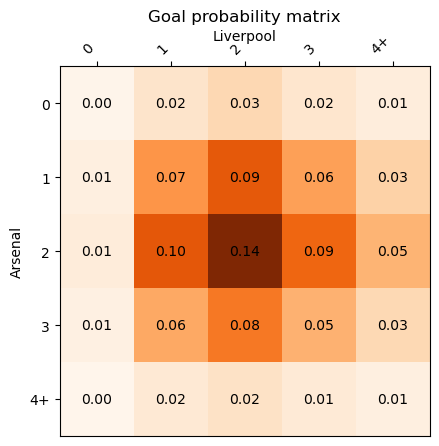

In [144]:
import numpy as np
import matplotlib.pyplot as plt


# Data
home = 'Arsenal'
away = 'Liverpool'
home_gs=goalSim(home, away, df_EPL_test_opp, rfc_opp, teamDF(home,df_EPL_test_opp), teamDF(away,df_EPL_test_opp))[0]
away_gs=goalSim(away, home, df_EPL_test_opp, rfc_opp, teamDF(away,df_EPL_test_opp), teamDF(home,df_EPL_test_opp))[0]
data =  np.outer(np.array(home_gs),
                 np.array(away_gs))

# Labels
xlabs = ["0", "1", "2", "3","4+"]
ylabs = ["0", "1", "2", "3","4+"]
# Specify the path to save the heatmap
save_path = 'heatmap.png'

# Plot and save the heatmap
plot_heatmap(data,xlabs,ylabs, save_path=save_path)

In [145]:
tmp = [0,0,0,home,away]
for i in range(10000):
    sim=simulateGame(home_gs, away_gs)
    res = sim[0]
    tmp[res]+=1

In [148]:
print(tmp[-2],tmp[-1])
print(tmp[0]/10000,tmp[1]/10000,tmp[2]/10000)

Arsenal Liverpool
0.3012 0.2675 0.4313
